<a href="https://colab.research.google.com/github/derekbomfimprates/CustomerSegmentation/blob/main/MallCustomerSegmentationUnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation

**Project Overview:**

This project utilizes unsupervised machine learning techniques, specifically the K-Means Clustering algorithm, to segment customers based on their purchasing behavior. Additionally, a decision tree model will be employed to provide insights into customer characteristics.

**Key Objectives:**

The primary goal of this project is to develop machine learning models to segment customers through K-Means clustering and a decision tree classifier. This will involve:
Comparing the performance of both models to determine which one provides better segmentation results.
Analyzing the differences in insights and outcomes between the two approaches.

# Import Section

In this section, I will import the necessary libraries, including Pandas for data manipulation, NumPy for numerical operations, and other libraries for building and evaluating machine learning models

In [51]:
# Import Section
# The following libraries are used for data manipulation, visualization, and machine learning model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#labelEncoder
from sklearn.preprocessing import LabelEncoder

# DATA scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


# Data Loading Section

In this section, I will import the dataset (in .csv format) and use Pandas to manipulate it.

## Data Loading Section
The dataset is from [Kaggle's Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data).


In [31]:
# Mounting to google driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Loading the dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [33]:
# Print the head of dataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
# Print the tail
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [35]:
# Print the information about the dataFrame. I want to check the type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
# Print the statistical information about the DataFrame to check the distribution.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
# Checking for missing values
df.isna().sum().sum()

0

In [38]:
# Checking for duplicate records
df.duplicated().sum().sum()

0

In [39]:
# The minority Gender is Female (1)
# The maiority Gender is Male (0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Outlier Detection and Treatment

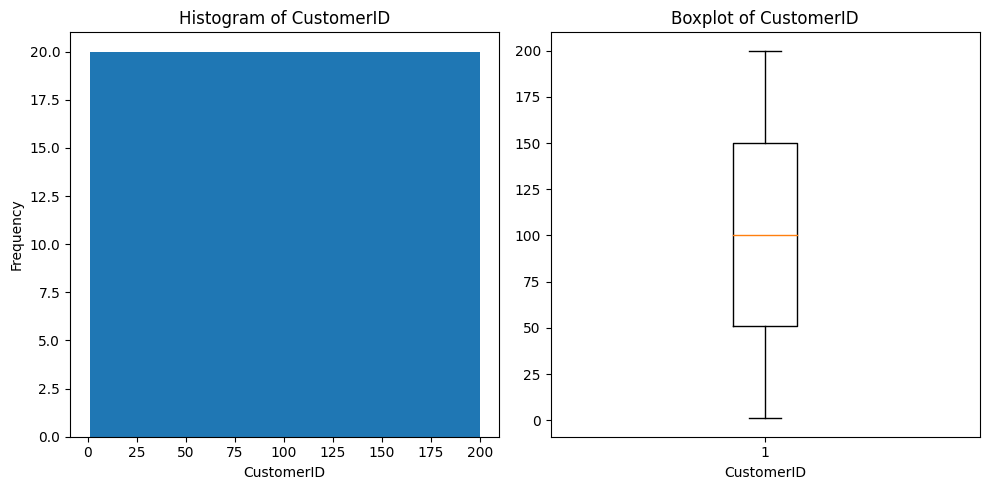

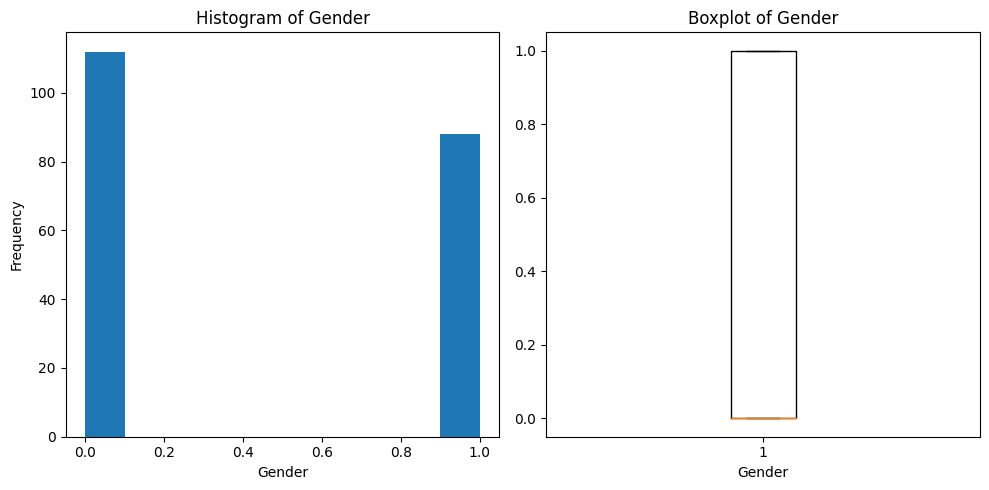

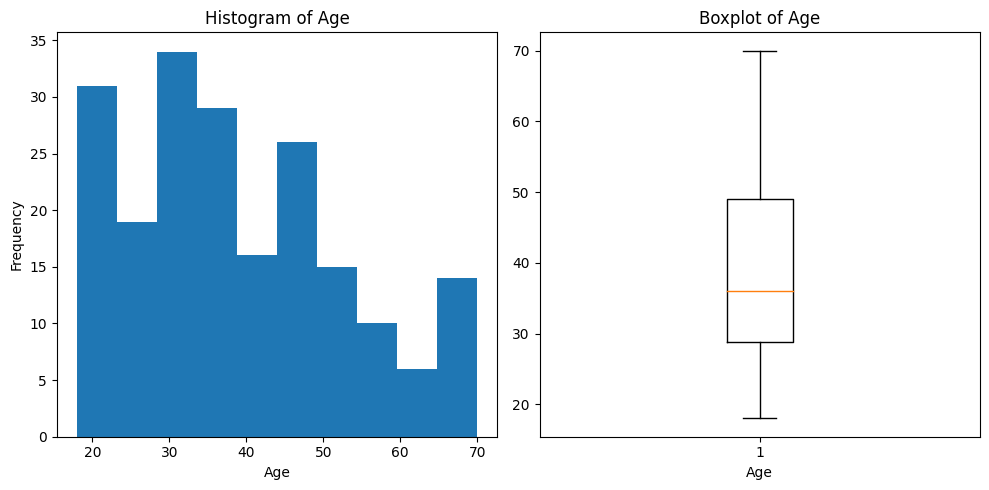

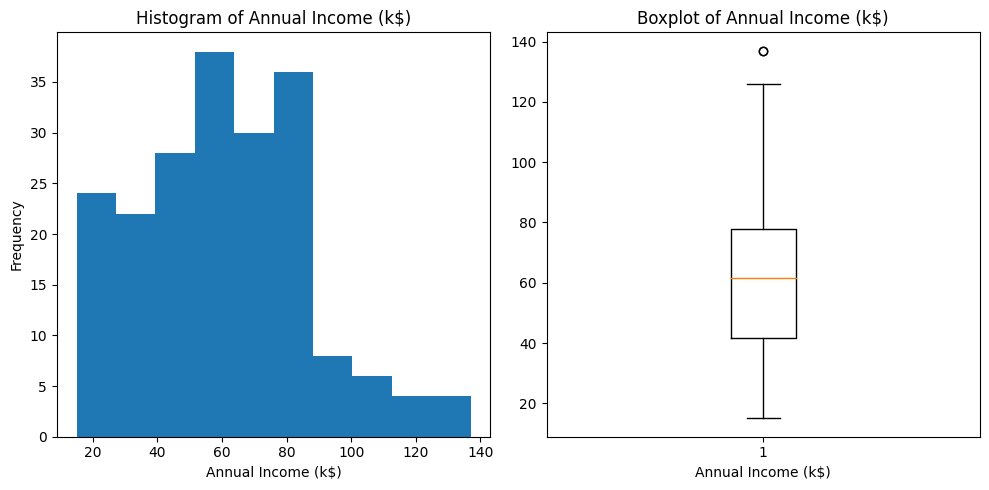

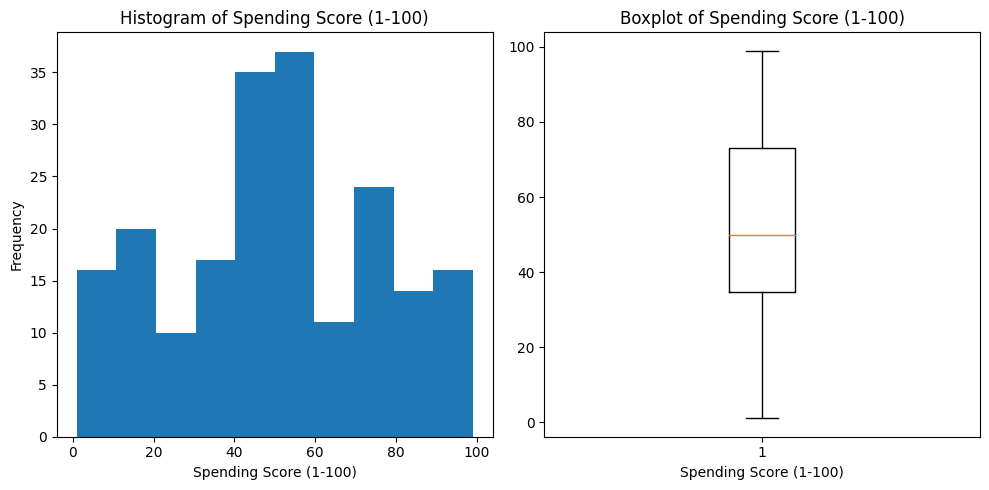

In [40]:
# Data visualization in subplots
# We do not need to plot the Gender and CustomerID features as for Gender there is only 2 options and for CustomerIDall details

df_plot=df
df_plot.drop(columns=['CustomerID', 'Gender'])
numeric_columns = df_plot.select_dtypes(include=['int64', 'float64']).columns

# Loop through the numeric columns
for col in numeric_columns:
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))

    # Histogram subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
    plt.hist(df_plot[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
    plt.boxplot(df_plot[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()


In [41]:
# Check if the gender distribution is balanced. In this case, it is not balanced, so we may need to apply a method to balance the data.
df['Gender'].value_counts()

,count
Gender,
0,112
1,88


In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **Scaler Data**

- **MinMaxScaler:** When the data has a bounded range, and you don’t expect extreme outliers.
- **StandardScaler**: When you assume that the data follows a normal (Gaussian) distribution.

In [43]:
# X represents the independent variables (excluding 'Gender')
X = df.drop(columns='Gender')
y = df['Gender']  # Dependent variable, though not needed for clustering

### Scale the variables ###

# Standard scaling
std = StandardScaler()
X_std = std.fit_transform(X)

# Print
print("\nStandard scaling (first 5 rows and 3 columns)\n", X_std[:5, :3])

# Min-Max scaling
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

# Print
print("\nMin-Max scaling (first 5 rows and 3 columns)\n", X_mm[:5, :3])


Standard scaling (first 5 rows and 3 columns)
 [[-1.7234121  -1.42456879 -1.73899919]
 [-1.70609137 -1.28103541 -1.73899919]
 [-1.68877065 -1.3528021  -1.70082976]
 [-1.67144992 -1.13750203 -1.70082976]
 [-1.6541292  -0.56336851 -1.66266033]]

Min-Max scaling (first 5 rows and 3 columns)
 [[0.         0.01923077 0.        ]
 [0.00502513 0.05769231 0.        ]
 [0.01005025 0.03846154 0.00819672]
 [0.01507538 0.09615385 0.00819672]
 [0.0201005  0.25       0.01639344]]


# K-means

**Interpreting the Elbow Method Graph**

**Axes:**

**X-Axis:** Represents the number of clusters (k) ranging from 1 to 10.

**Y-Axis:** Represents the inertia, which is the sum of squared distances between data points and their corresponding cluster centers. Lower inertia values indicate better cluster compactness.

**Identifying the Elbow Point:**

The **elbow** point is where the inertia begins to decrease at a slower rate.

In this graph, it appears that the elbow point is around k=3 .(let check k= 2, 3, 4.)

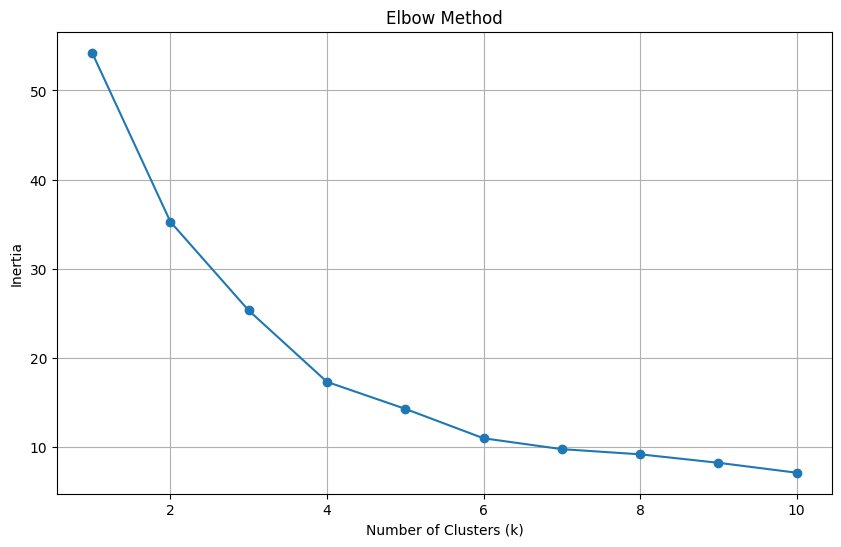

In [44]:
# Applying ML K-means

# First, determine the optimal number of clusters (k): from the graph, we can identify the point where the curve starts to flatten or change at a slower rate—this is likely the ideal value for k.

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)  # test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_mm)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


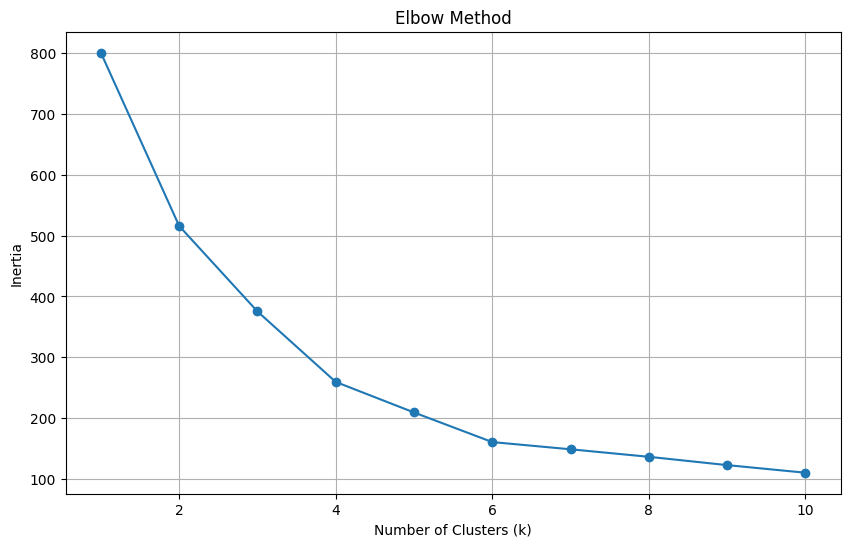

In [45]:
# Applying ML K-means

# First, determine the optimal number of clusters (k): from the graph, we can identify the point where the curve starts to flatten or change at a slower rate—this is likely the ideal value for k.

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)  # test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


**Test K**

In this section, we will test some values of k to examine if the elbow method gives us a good indication of the optimal number of clusters k.

The evaluate will be done by **Silhouette score**:

It is a metric used to evaluate the quality of clusters in unsupervised learning.

 It measures how similar an object is to its own cluster compared to other clusters.

 A higher Silhouette Score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.

 Silhouette [0,1]

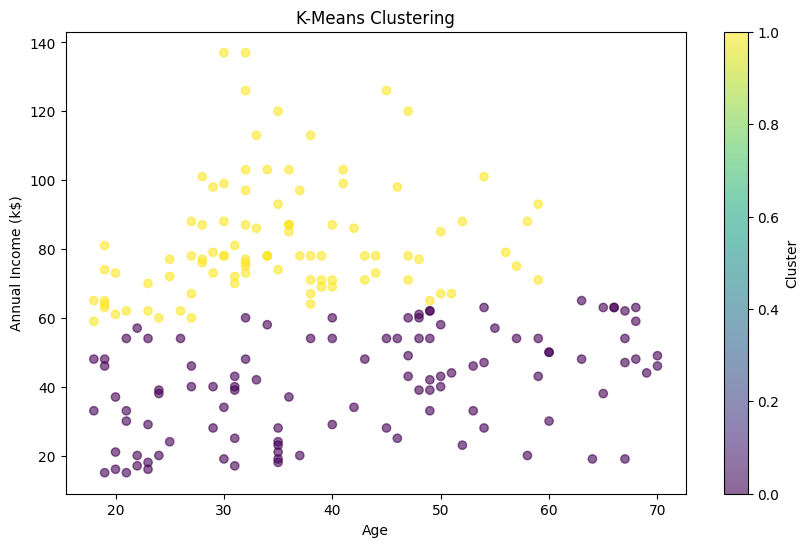

Cluster sizes:
 Cluster
0    105
1     95
Name: count, dtype: int64

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         53.676190  0.419048  42.219048           40.780952   
1        152.252632  0.463158  35.126316           82.421053   

         Spending Score (1-100)  
Cluster                          
0                     49.961905  
1                     50.463158  
Silhouette Score: 0.3185


In [46]:
### K-Means Clustering ###
# Set the number of clusters
optimal_k = 2

# Fit the K-Means model on the scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_std)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters using Age and Annual Income (original unscaled features for interpretation)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each cluster
print("Cluster sizes:\n", df['Cluster'].value_counts())

# Group the data by clusters and calculate the mean of each feature
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)

# Compute Silhouette Score on the same standardized data used for clustering (X_std)
sil_score = silhouette_score(X_std, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.4f}')

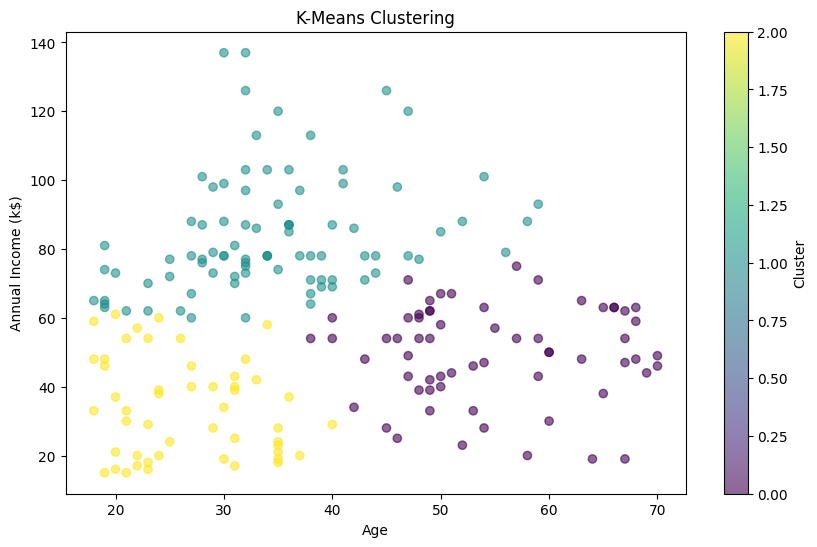

Cluster sizes:
 Cluster
1    87
0    63
2    50
Name: count, dtype: int64

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         73.253968  0.460317  54.714286           49.492063   
1        155.321839  0.448276  34.413793           83.839080   
2         39.440000  0.400000  26.580000           34.000000   

         Spending Score (1-100)  
Cluster                          
0                     40.571429  
1                     51.839080  
2                     59.480000  
Silhouette Score: 0.3371


In [47]:
### K-Means Clustering ###
# Set the number of clusters
optimal_k = 3

# Fit the K-Means model on the scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_std)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters using Age and Annual Income (original unscaled features for interpretation)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each cluster
print("Cluster sizes:\n", df['Cluster'].value_counts())

# Group the data by clusters and calculate the mean of each feature
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)

# Compute Silhouette Score on the same standardized data used for clustering (X_std)
sil_score = silhouette_score(X_std, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.4f}')

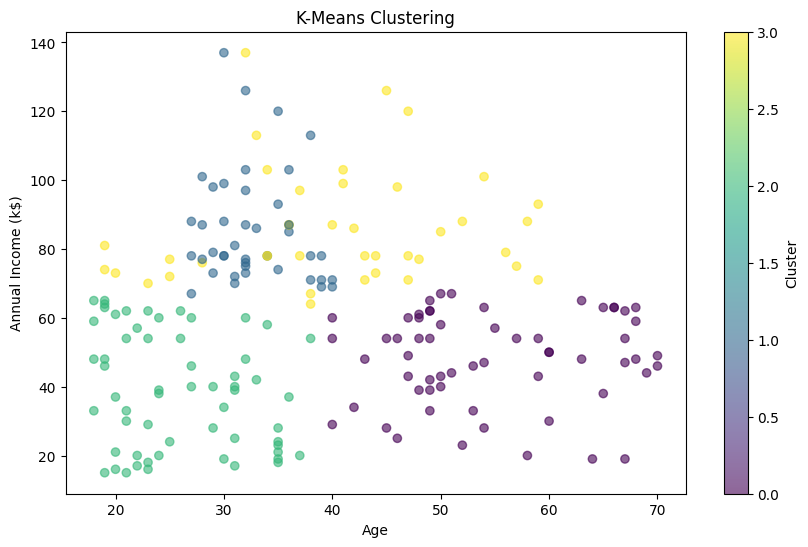

Cluster sizes:
 Cluster
0    60
2    59
1    41
3    40
Name: count, dtype: int64

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.350000  0.433333  54.766667           47.933333   
1        160.048780  0.463415  32.731707           85.634146   
2         50.610169  0.389831  25.949153           38.779661   
3        159.775000  0.500000  40.275000           85.925000   

         Spending Score (1-100)  
Cluster                          
0                     41.783333  
1                     80.902439  
2                     58.067797  
3                     19.750000  
Silhouette Score: 0.4140


In [48]:
### K-Means Clustering ###
# Set the number of clusters
optimal_k = 4

# Fit the K-Means model on the scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_std)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters using Age and Annual Income (original unscaled features for interpretation)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each cluster
print("Cluster sizes:\n", df['Cluster'].value_counts())

# Group the data by clusters and calculate the mean of each feature
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)

# Compute Silhouette Score on the same standardized data used for clustering (X_std)
sil_score = silhouette_score(X_std, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.4f}')

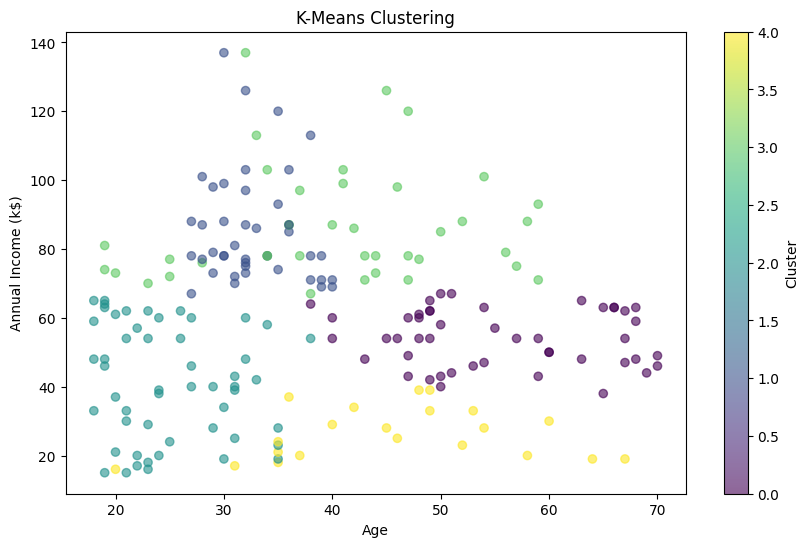

Cluster sizes:
 Cluster
2    52
0    47
1    41
3    39
4    21
Name: count, dtype: int64

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         82.851064  0.425532  55.255319           54.063830   
1        160.048780  0.463415  32.731707           85.634146   
2         55.365385  0.403846  25.038462           41.057692   
3        160.974359  0.512821  40.333333           86.487179   
4         23.190476  0.380952  45.523810           26.285714   

         Spending Score (1-100)  
Cluster                          
0                     49.000000  
1                     80.902439  
2                     62.788462  
3                     19.179487  
4                     19.380952  
Silhouette Score: 0.4272


In [49]:

### K-Means Clustering ###
# Set the number of clusters
optimal_k = 5

# Fit the K-Means model on the scaled data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_std)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters using Age and Annual Income (original unscaled features for interpretation)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each cluster
print("Cluster sizes:\n", df['Cluster'].value_counts())

# Group the data by clusters and calculate the mean of each feature
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:\n", cluster_analysis)

# Compute Silhouette Score on the same standardized data used for clustering (X_std)
sil_score = silhouette_score(X_std, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.4f}')

# Hierarchical Clustering (Agglomerative Clustering)

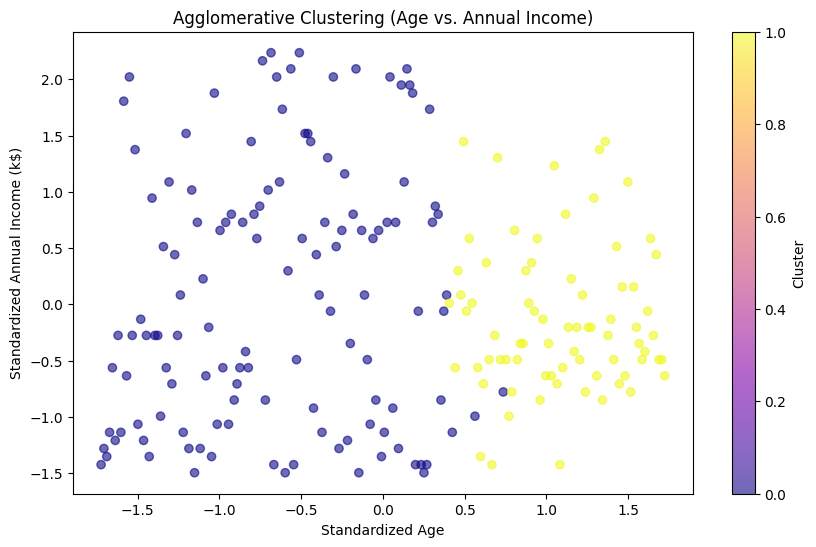

Agglomerative Cluster sizes:
AggCluster
0    126
1     74
Name: count, dtype: int64
Agglomerative Cluster analysis (mean of each feature):
            CustomerID    Gender        Age  Annual Income (k$)  \
AggCluster                                                        
0            63.706349  0.396825  39.968254           44.833333   
1           163.148649  0.513514  36.945946           87.337838   

            Spending Score (1-100)   Cluster  
AggCluster                                    
0                        49.460317  1.603175  
1                        51.459459  1.945946  


In [53]:
# Set the optimal number of clusters
optimal_k = 2

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df['AggCluster'] = agg_clustering.fit_predict(X_std)

# Visualize the clusters using Age and Annual Income (using standardized features)
plt.figure(figsize=(10, 6))

# Assuming Age and Annual Income are in specific columns of X_std (e.g., columns 0 and 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=df['AggCluster'], cmap='plasma', alpha=0.6)
plt.title('Agglomerative Clustering (Age vs. Annual Income)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each Agglomerative cluster
print("Agglomerative Cluster sizes:")
print(df['AggCluster'].value_counts())

# Group the data by Agglomerative clusters and calculate the mean of each feature
agg_cluster_analysis = df.groupby('AggCluster').mean()
print("Agglomerative Cluster analysis (mean of each feature):")
print(agg_cluster_analysis)


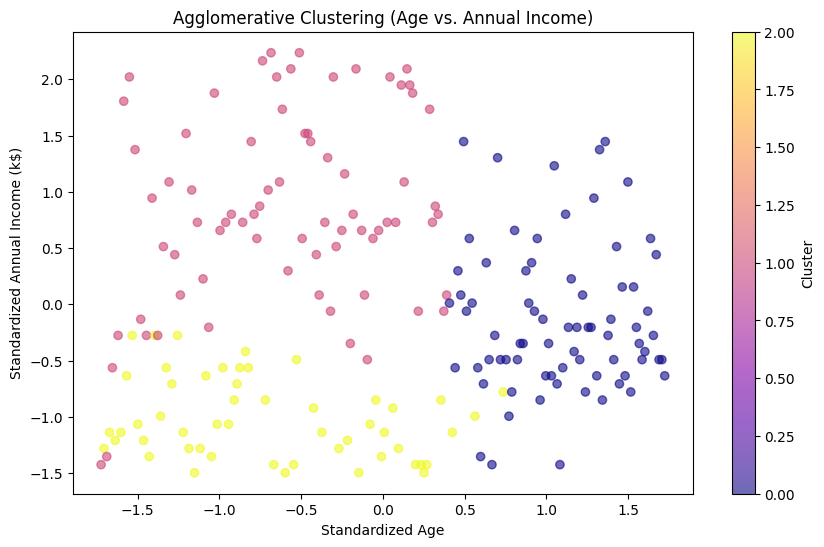

Agglomerative Cluster sizes:
AggCluster
1    74
0    74
2    52
Name: count, dtype: int64
Agglomerative Cluster analysis (mean of each feature):
            CustomerID    Gender        Age  Annual Income (k$)  \
AggCluster                                                        
0           163.148649  0.513514  36.945946           87.337838   
1            66.121622  0.405405  50.729730           46.162162   
2            60.269231  0.384615  24.653846           42.942308   

            Spending Score (1-100)   Cluster  
AggCluster                                    
0                        51.459459  1.945946  
1                        40.594595  1.297297  
2                        62.076923  2.038462  


In [54]:
# Set the optimal number of clusters
optimal_k = 3

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df['AggCluster'] = agg_clustering.fit_predict(X_std)

# Visualize the clusters using Age and Annual Income (using standardized features)
plt.figure(figsize=(10, 6))

# Assuming Age and Annual Income are in specific columns of X_std (e.g., columns 0 and 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=df['AggCluster'], cmap='plasma', alpha=0.6)
plt.title('Agglomerative Clustering (Age vs. Annual Income)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each Agglomerative cluster
print("Agglomerative Cluster sizes:")
print(df['AggCluster'].value_counts())

# Group the data by Agglomerative clusters and calculate the mean of each feature
agg_cluster_analysis = df.groupby('AggCluster').mean()
print("Agglomerative Cluster analysis (mean of each feature):")
print(agg_cluster_analysis)


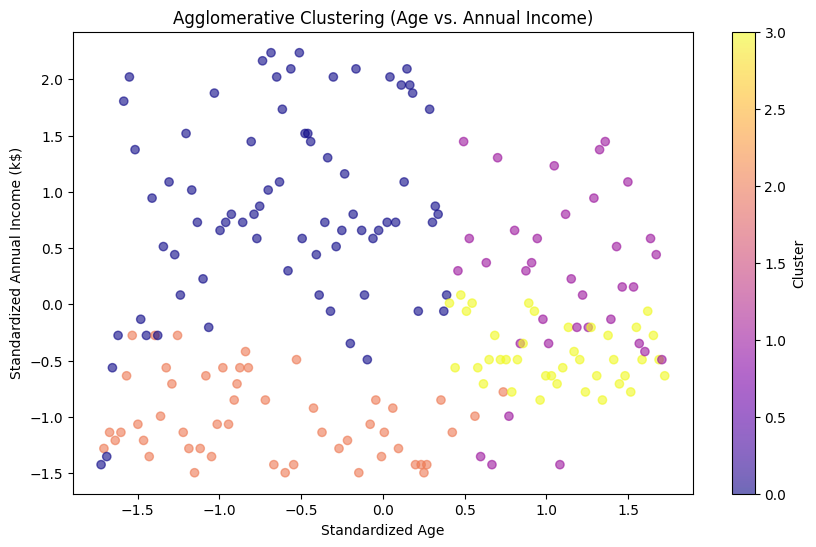

Agglomerative Cluster sizes:
AggCluster
0    74
2    52
3    39
1    35
Name: count, dtype: int64
Agglomerative Cluster analysis (mean of each feature):
            CustomerID    Gender        Age  Annual Income (k$)  \
AggCluster                                                        
0            66.121622  0.405405  50.729730           46.162162   
1           164.428571  0.571429  41.685714           88.228571   
2            60.269231  0.384615  24.653846           42.942308   
3           162.000000  0.461538  32.692308           86.538462   

            Spending Score (1-100)   Cluster  
AggCluster                                    
0                        40.594595  1.297297  
1                        17.285714  3.000000  
2                        62.076923  2.038462  
3                        82.128205  1.000000  


In [55]:
# Set the optimal number of clusters
optimal_k = 4

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df['AggCluster'] = agg_clustering.fit_predict(X_std)

# Visualize the clusters using Age and Annual Income (using standardized features)
plt.figure(figsize=(10, 6))

# Assuming Age and Annual Income are in specific columns of X_std (e.g., columns 0 and 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=df['AggCluster'], cmap='plasma', alpha=0.6)
plt.title('Agglomerative Clustering (Age vs. Annual Income)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each Agglomerative cluster
print("Agglomerative Cluster sizes:")
print(df['AggCluster'].value_counts())

# Group the data by Agglomerative clusters and calculate the mean of each feature
agg_cluster_analysis = df.groupby('AggCluster').mean()
print("Agglomerative Cluster analysis (mean of each feature):")
print(agg_cluster_analysis)


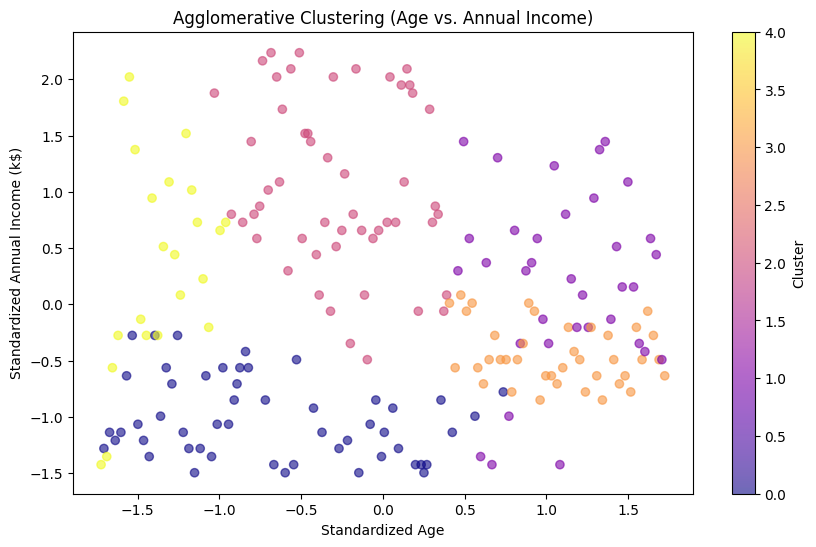

Agglomerative Cluster sizes:
AggCluster
0    52
2    52
3    39
1    35
4    22
Name: count, dtype: int64
Agglomerative Cluster analysis (mean of each feature):
            CustomerID    Gender        Age  Annual Income (k$)  \
AggCluster                                                        
0            60.269231  0.384615  24.653846           42.942308   
1           164.428571  0.571429  41.685714           88.228571   
2            84.711538  0.403846  53.442308           54.788462   
3           162.000000  0.461538  32.692308           86.538462   
4            22.181818  0.409091  44.318182           25.772727   

            Spending Score (1-100)   Cluster  
AggCluster                                    
0                        62.076923  2.038462  
1                        17.285714  3.000000  
2                        49.192308  0.192308  
3                        82.128205  1.000000  
4                        20.272727  3.909091  


In [56]:
# Set the optimal number of clusters
optimal_k = 5

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df['AggCluster'] = agg_clustering.fit_predict(X_std)

# Visualize the clusters using Age and Annual Income (using standardized features)
plt.figure(figsize=(10, 6))

# Assuming Age and Annual Income are in specific columns of X_std (e.g., columns 0 and 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=df['AggCluster'], cmap='plasma', alpha=0.6)
plt.title('Agglomerative Clustering (Age vs. Annual Income)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Display the size of each Agglomerative cluster
print("Agglomerative Cluster sizes:")
print(df['AggCluster'].value_counts())

# Group the data by Agglomerative clusters and calculate the mean of each feature
agg_cluster_analysis = df.groupby('AggCluster').mean()
print("Agglomerative Cluster analysis (mean of each feature):")
print(agg_cluster_analysis)


# Decision Tree

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)


In [58]:

# Create and train the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [59]:

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        21
           1       0.47      0.37      0.41        19

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.49      0.50      0.49        40



In [60]:

# Define parameters for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_best))



Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        21
           1       0.73      0.42      0.53        19

    accuracy                           0.65        40
   macro avg       0.67      0.64      0.63        40
weighted avg       0.67      0.65      0.63        40



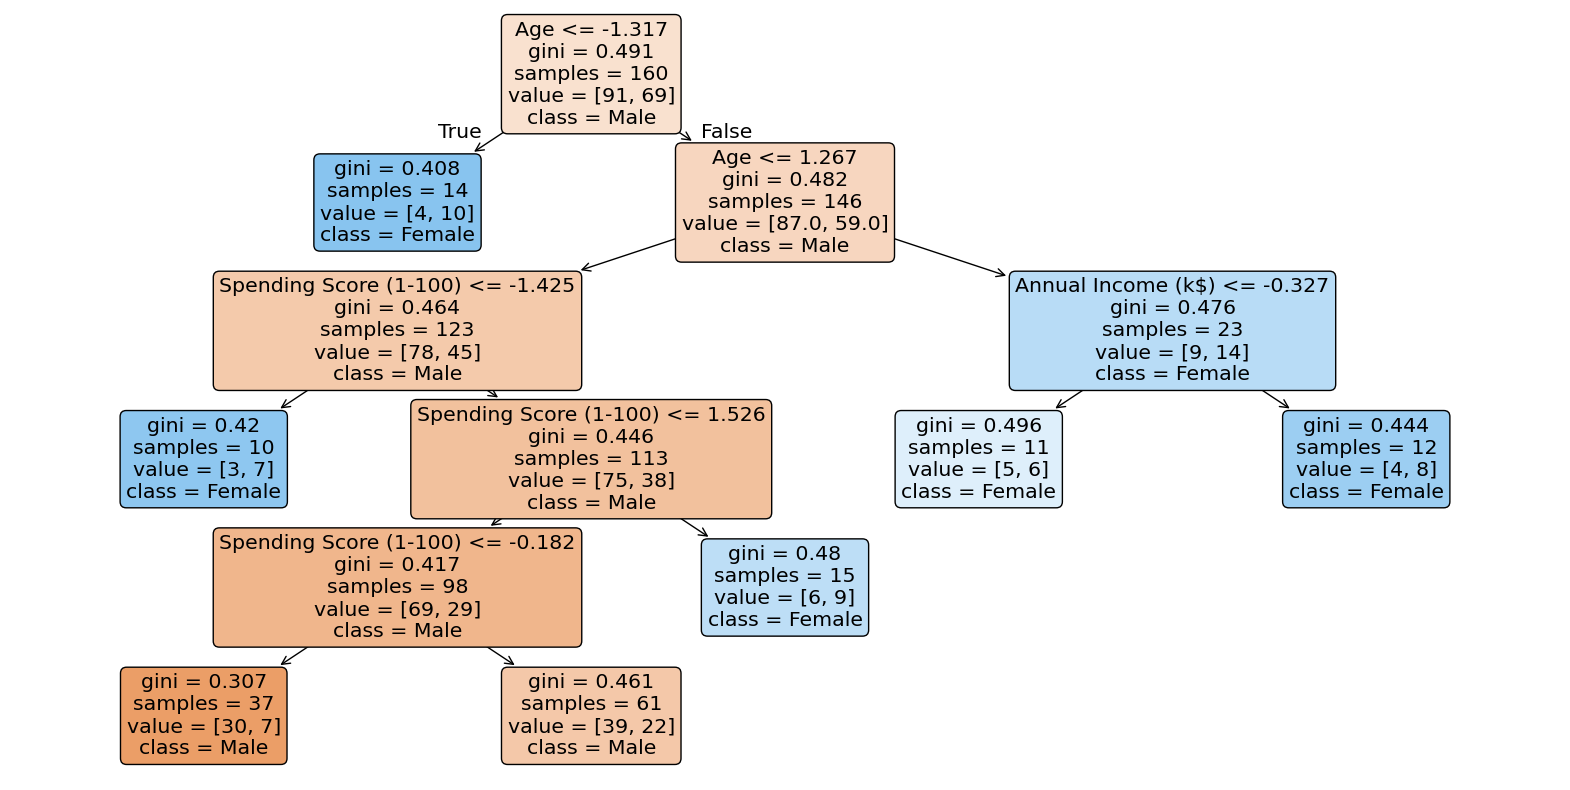

In [61]:

# Assuming the best decision tree from GridSearchCV is saved as 'best_clf'
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Male', 'Female'], rounded=True)
plt.show()



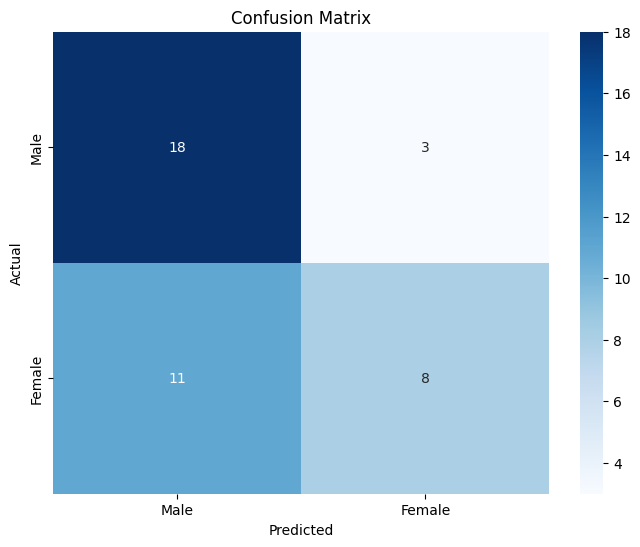

In [62]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
